<a href="https://www.kaggle.com/code/sakethyalamanchili/adult-census-income?scriptVersionId=194178782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Adult Census Income

***1. What is Census Income?***
- *Census Income refers to data collected to understand the income distribution within a population. This data helps in analyzing economic trends, making policy decisions, and planning services by identifying income levels across various demographics.*

***2. What is Our Problem Statement?***
- *The goal is to predict whether an individual's income exceeds $50K per year based on specific features from census data.*

***3. Where is the Dataset From?***
- *The dataset is available on Kaggle: [Adult Census Income Dataset](https://www.kaggle.com/datasets/uciml/adult-census-income).*

***4. What Will We Do With This Data?***
- *We will explore and analyze the dataset, apply Principal Component Analysis (PCA) to reduce dimensionality, and use Logistic Regression to build a predictive model for income classification.*


## Understanding Key Concepts: Curse of Dimensionality, PCA, EDA, and Logistic Regression

---

### What is the Curse of Dimensionality?

The **curse of dimensionality** occurs when working with data that has many features (dimensions), which can make analysis challenging. Here's why:

1. **Data Gets Spread Out:** As the number of dimensions increases, the data becomes more dispersed, making it harder to detect patterns or correlations.
2. **Increased Computational Cost:** Higher dimensions require more computational power and time, slowing down the analysis.
3. **Risk of Overfitting:** Too many features can cause a model to fit the training data too closely, leading to poor generalization on new data.
4. **Visualization Challenges:** Visualizing data beyond 3D is difficult, making it harder to intuitively understand the data.

To manage the curse of dimensionality, we often reduce the number of dimensions, focusing on the most critical features, which simplifies the analysis and improves model performance.

---

### Introduction to Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to simplify complex datasets by reducing the number of features while retaining most of the important information.

#### Why Use PCA?
- PCA is useful for dealing with datasets with many features, making them easier to analyze and visualize.

#### How Does PCA Work?
1. **Standardization:** The data is standardized to ensure all features contribute equally.
2. **Covariance Matrix:** PCA calculates covariances between features to understand their relationships.
3. **Eigenvectors and Eigenvalues:** PCA identifies directions (principal components) where the data varies the most.
4. **Dimensionality Reduction:** The data is projected onto these principal components, reducing the number of dimensions while preserving most of the variability.

#### Benefits of PCA
- **Reduces Complexity:** Simplifies data by focusing on the most important features.
- **Improves Model Performance:** Helps in reducing overfitting.
- **Enhances Visualization:** Facilitates visualization of high-dimensional data in 2D or 3D.

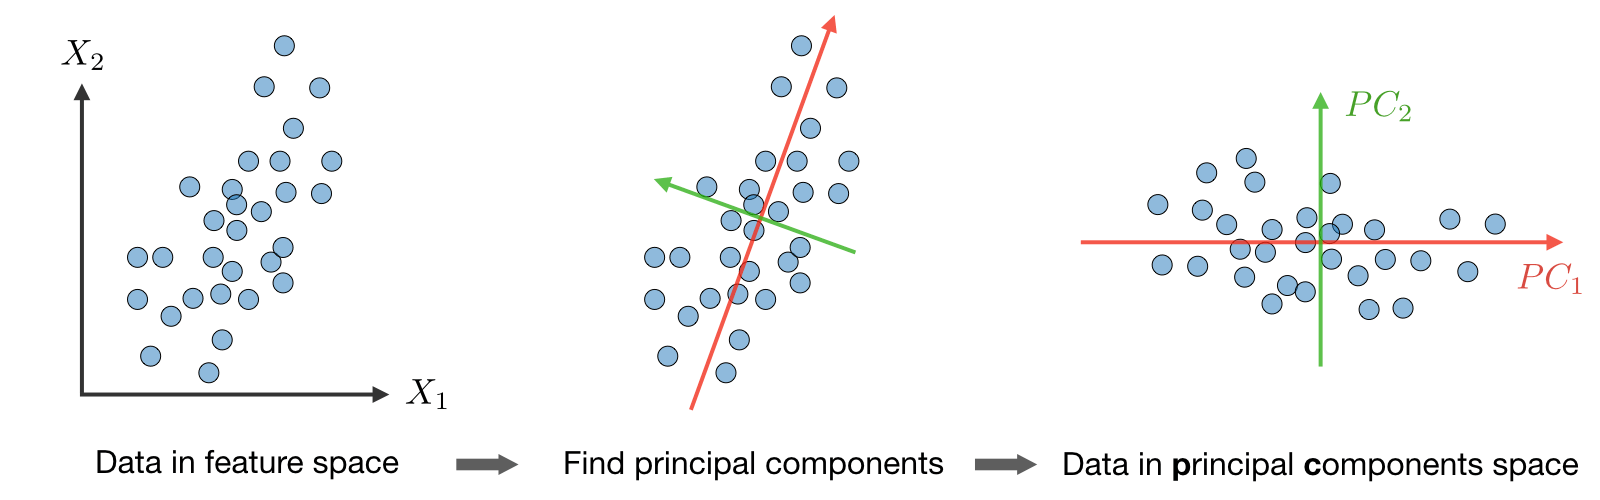

---

### Introduction to Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is the process of analyzing datasets to summarize their main characteristics, often using visual methods.

#### Goals of EDA
- **Understand the Data:** Gain insights into the data’s structure, including distributions and missing values.
- **Identify Patterns:** Detect relationships, trends, and outliers through visualizations.
- **Guide Further Analysis:** EDA helps in selecting appropriate models and analysis methods.

EDA is essential because it prepares the dataset for modeling by ensuring that the data is well-understood and clean.

---

### Introduction to Logistic Regression

**Logistic Regression** is a statistical method used for binary classification tasks, predicting one of two possible outcomes (e.g., whether income exceeds $50K or not).

### Key Features of Logistic Regression
- **Binary Outcomes:** Predicts the probability of a binary outcome.
- **Sigmoid Function:** Uses the sigmoid function to ensure output probabilities between 0 and 1.
- **Interpretability:** Coefficients show the influence of each feature on the outcome, making it an easily interpretable model.

Logistic Regression is widely used for binary classification problems due to its simplicity and effectiveness.

---

***Summary: Applying EDA, PCA, and Logistic Regression***

*When analyzing a dataset:*

1. ***Start with EDA:*** Begin by exploring and visualizing the data to understand its structure and clean any inconsistencies.
2. ***Apply PCA (if needed):*** Use Principal Component Analysis (PCA) to reduce the number of dimensions while retaining essential information, particularly in high-dimensional datasets.
3. ***Use Logistic Regression:*** Build a predictive model with Logistic Regression to classify data and understand the relationship between features and the target variable.

*By integrating EDA, PCA, and Logistic Regression, you can effectively explore, simplify, and model complex datasets, leading to more accurate and insightful predictions.*


## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

***The data shows that there are no null values, but we can clearly see that there are '?' symbols present, which represent null values. Therefore, we need to replace the '?' symbols with null.***

In [4]:
data[data == '?'] = np.nan

In [5]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Percentage of missing data
for column in ['workclass', 'occupation', 'native.country']:
    missing_count = data[column].isna().sum()
    percentage = (missing_count / len(data)) * 100
    print(f"Missing Data Percentage of {column}: {percentage:.2f}%")

Missing Data Percentage of workclass: 5.64%
Missing Data Percentage of occupation: 5.66%
Missing Data Percentage of native.country: 1.79%


In [9]:
for column in ['workclass', 'occupation', 'native.country']:
    print(f"{column}: {data[column].value_counts()}\n----------")

workclass: workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
----------
occupation: occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
----------
native.country: native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                      

In [10]:
# Calculate the most frequent value for each column
most_frequent_workclass = data['workclass'].mode()[0]
most_frequent_occupation = data['occupation'].mode()[0]
most_frequent_native_country = data['native.country'].mode()[0]

# Impute missing data with the most frequent value (mode)
data['workclass'].fillna(most_frequent_workclass, inplace=True)
data['occupation'].fillna(most_frequent_occupation, inplace=True)
data['native.country'].fillna(most_frequent_native_country, inplace=True)

In [11]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [12]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

***Now we can confirm that there are no missing values in the dataset.***

## Exploratory Data Analysis (EDA)

In [13]:
categorical_features = []
numerical_features = []

for index, feature in enumerate(data):
    if data[feature].nunique() < 10:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

In [14]:
categorical_features

['workclass', 'marital.status', 'relationship', 'race', 'sex', 'income']

In [15]:
numerical_features

['age',
 'fnlwgt',
 'education',
 'education.num',
 'occupation',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country']

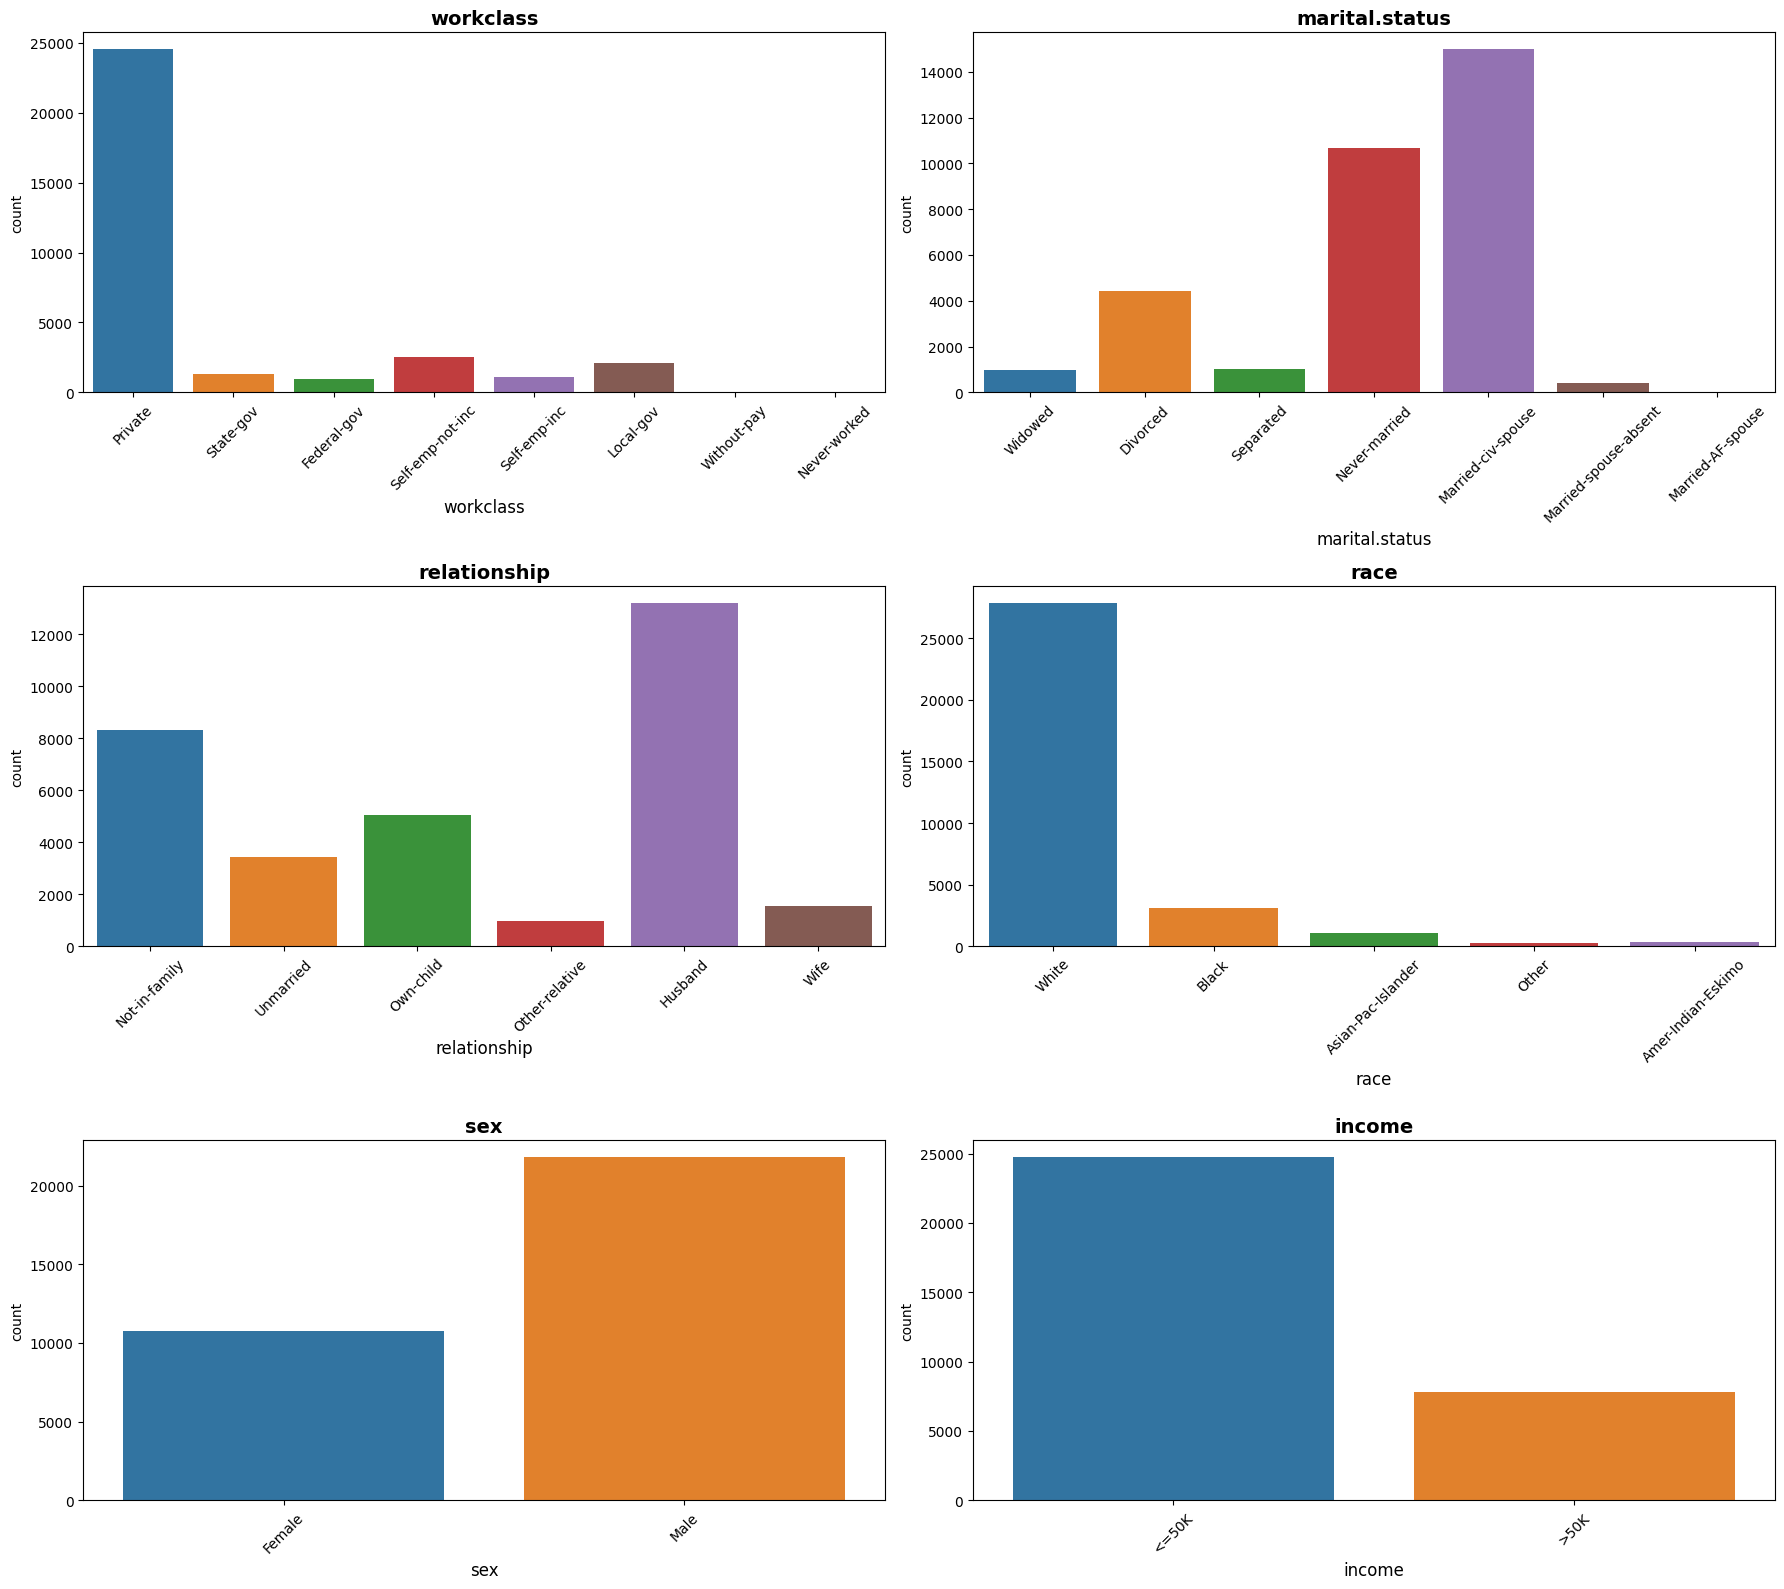

In [16]:
plt.figure(figsize=(18,16))
for index, feature in enumerate(categorical_features):
    plt.subplot(3, 2, index + 1)
    sns.countplot(x=data[feature])
    plt.title(feature, fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

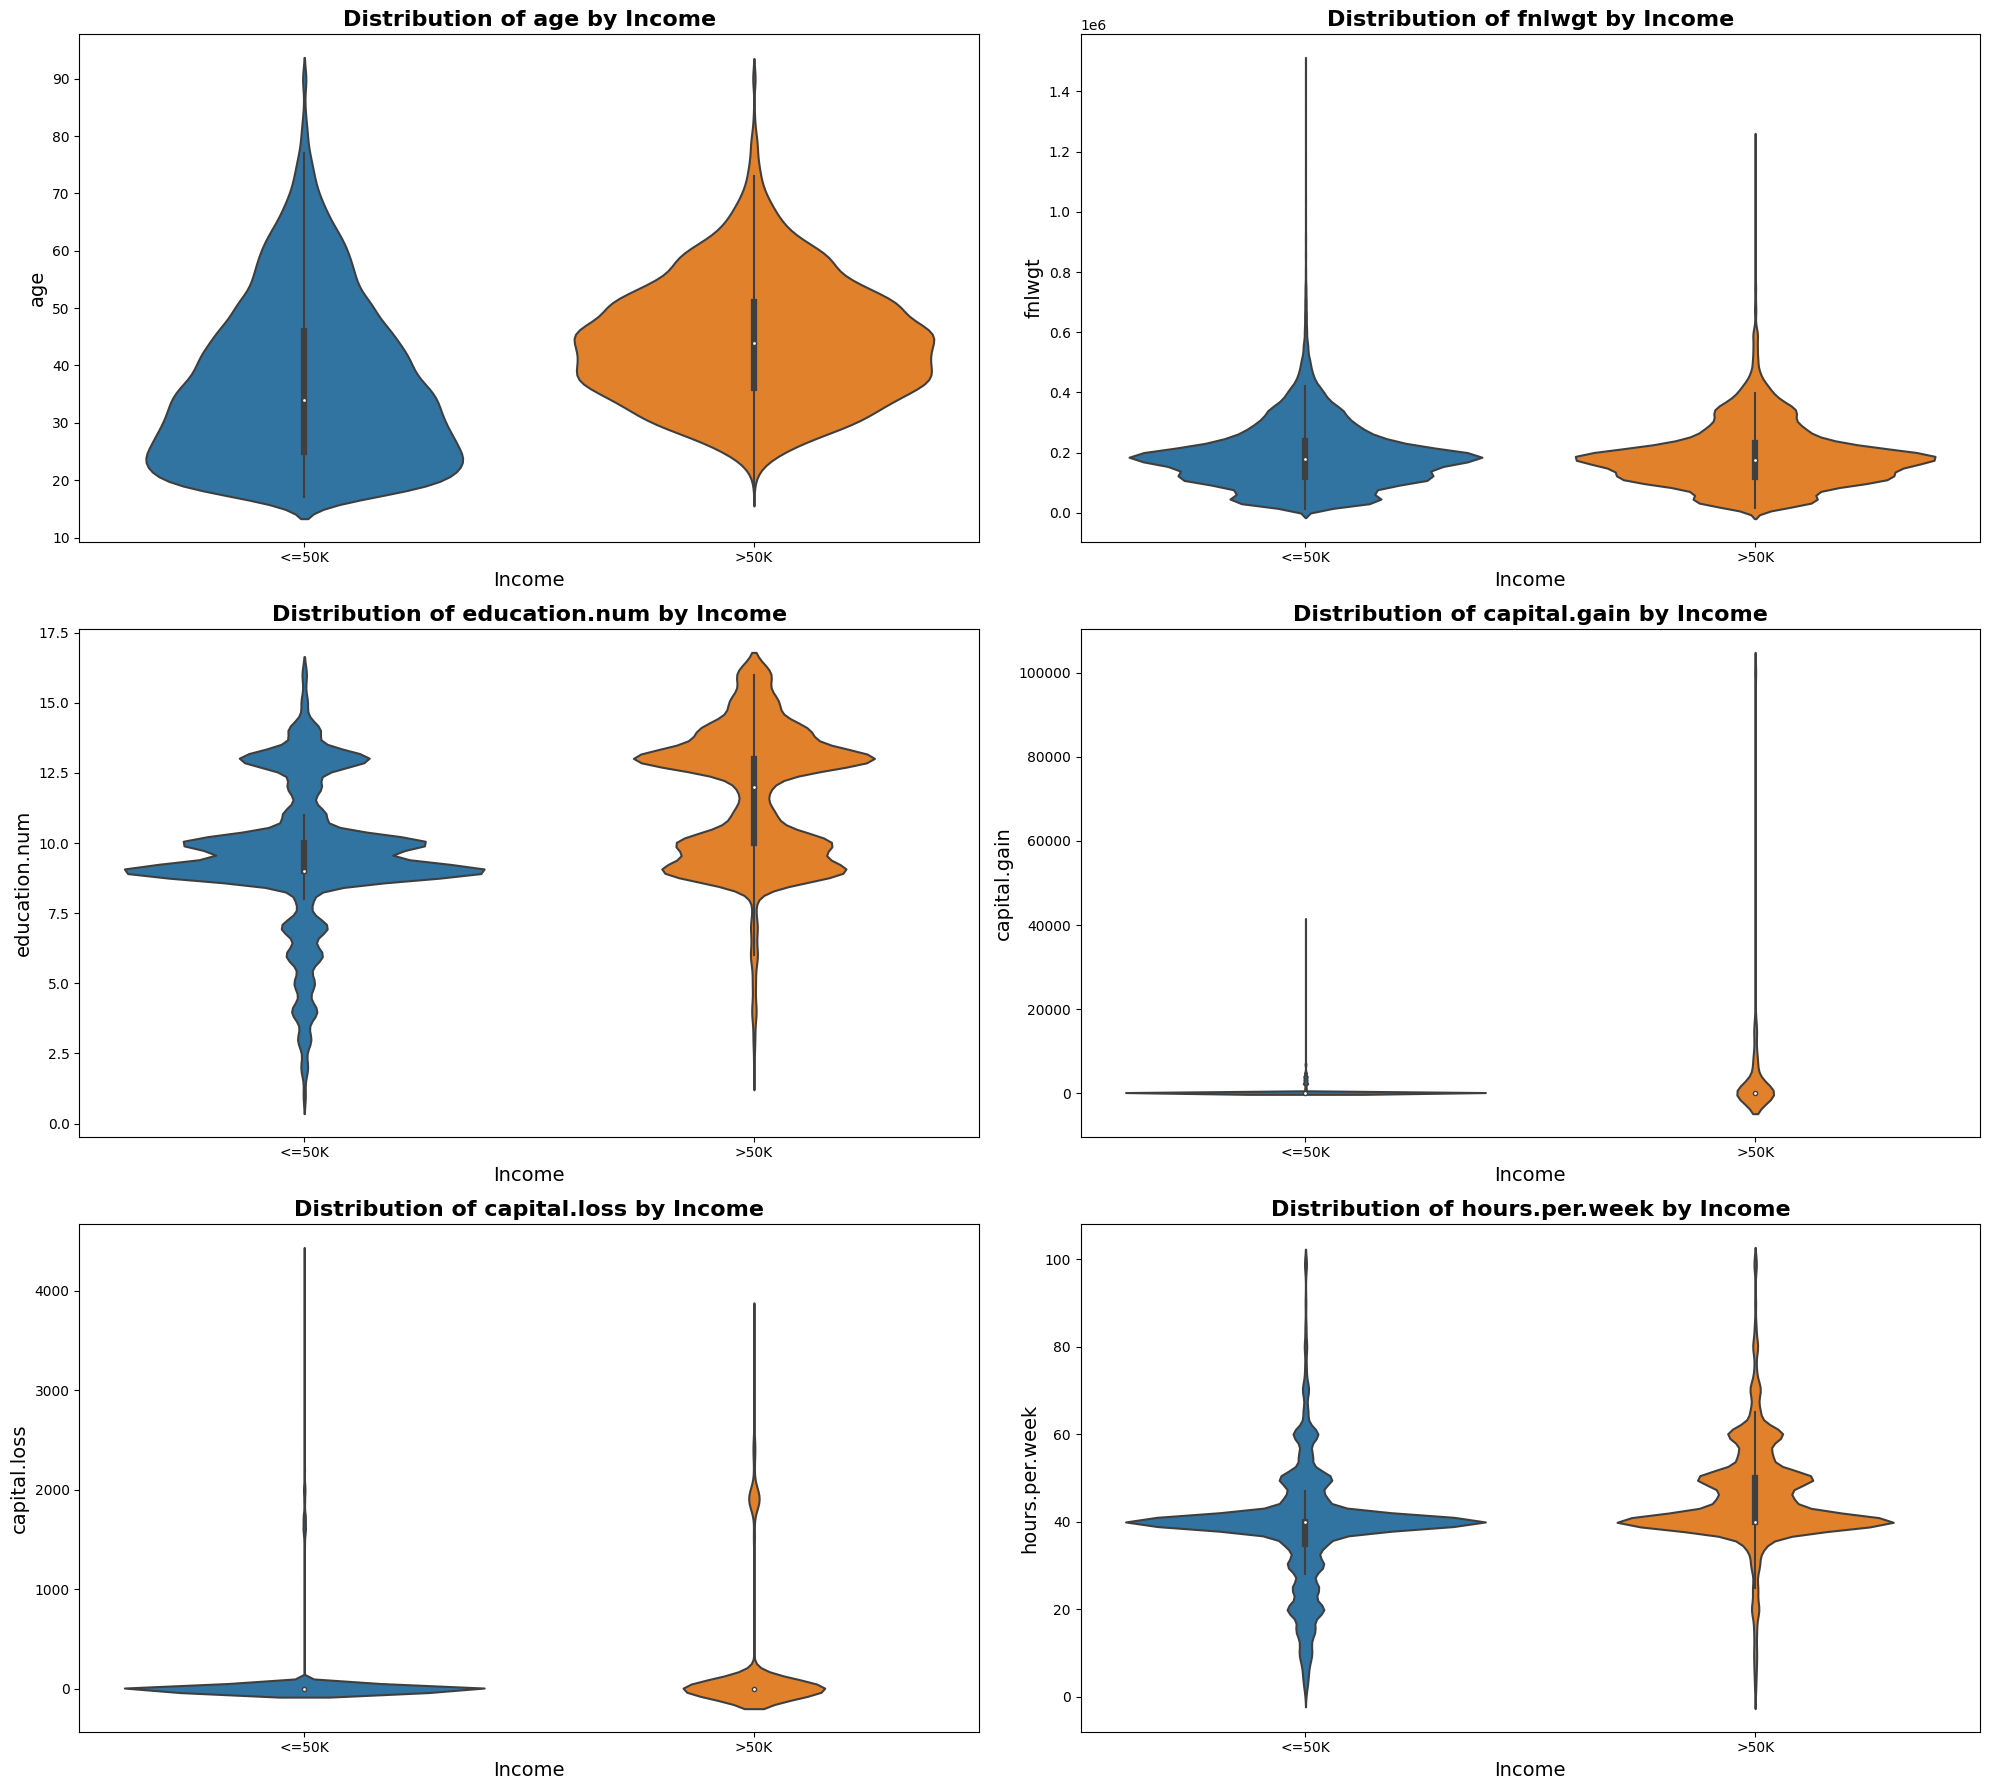

In [17]:
numerical_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

plt.figure(figsize=(20, 18))
for index, feature in enumerate(numerical_features):
    plt.subplot(3, 2, index + 1)
    sns.violinplot(x=data['income'], y=data[feature])
    plt.title(f'Distribution of {feature} by Income', fontsize=16, fontweight='bold')
    plt.xlabel('Income', fontsize=14)
    plt.ylabel(feature, fontsize=14)

plt.tight_layout()
plt.show()


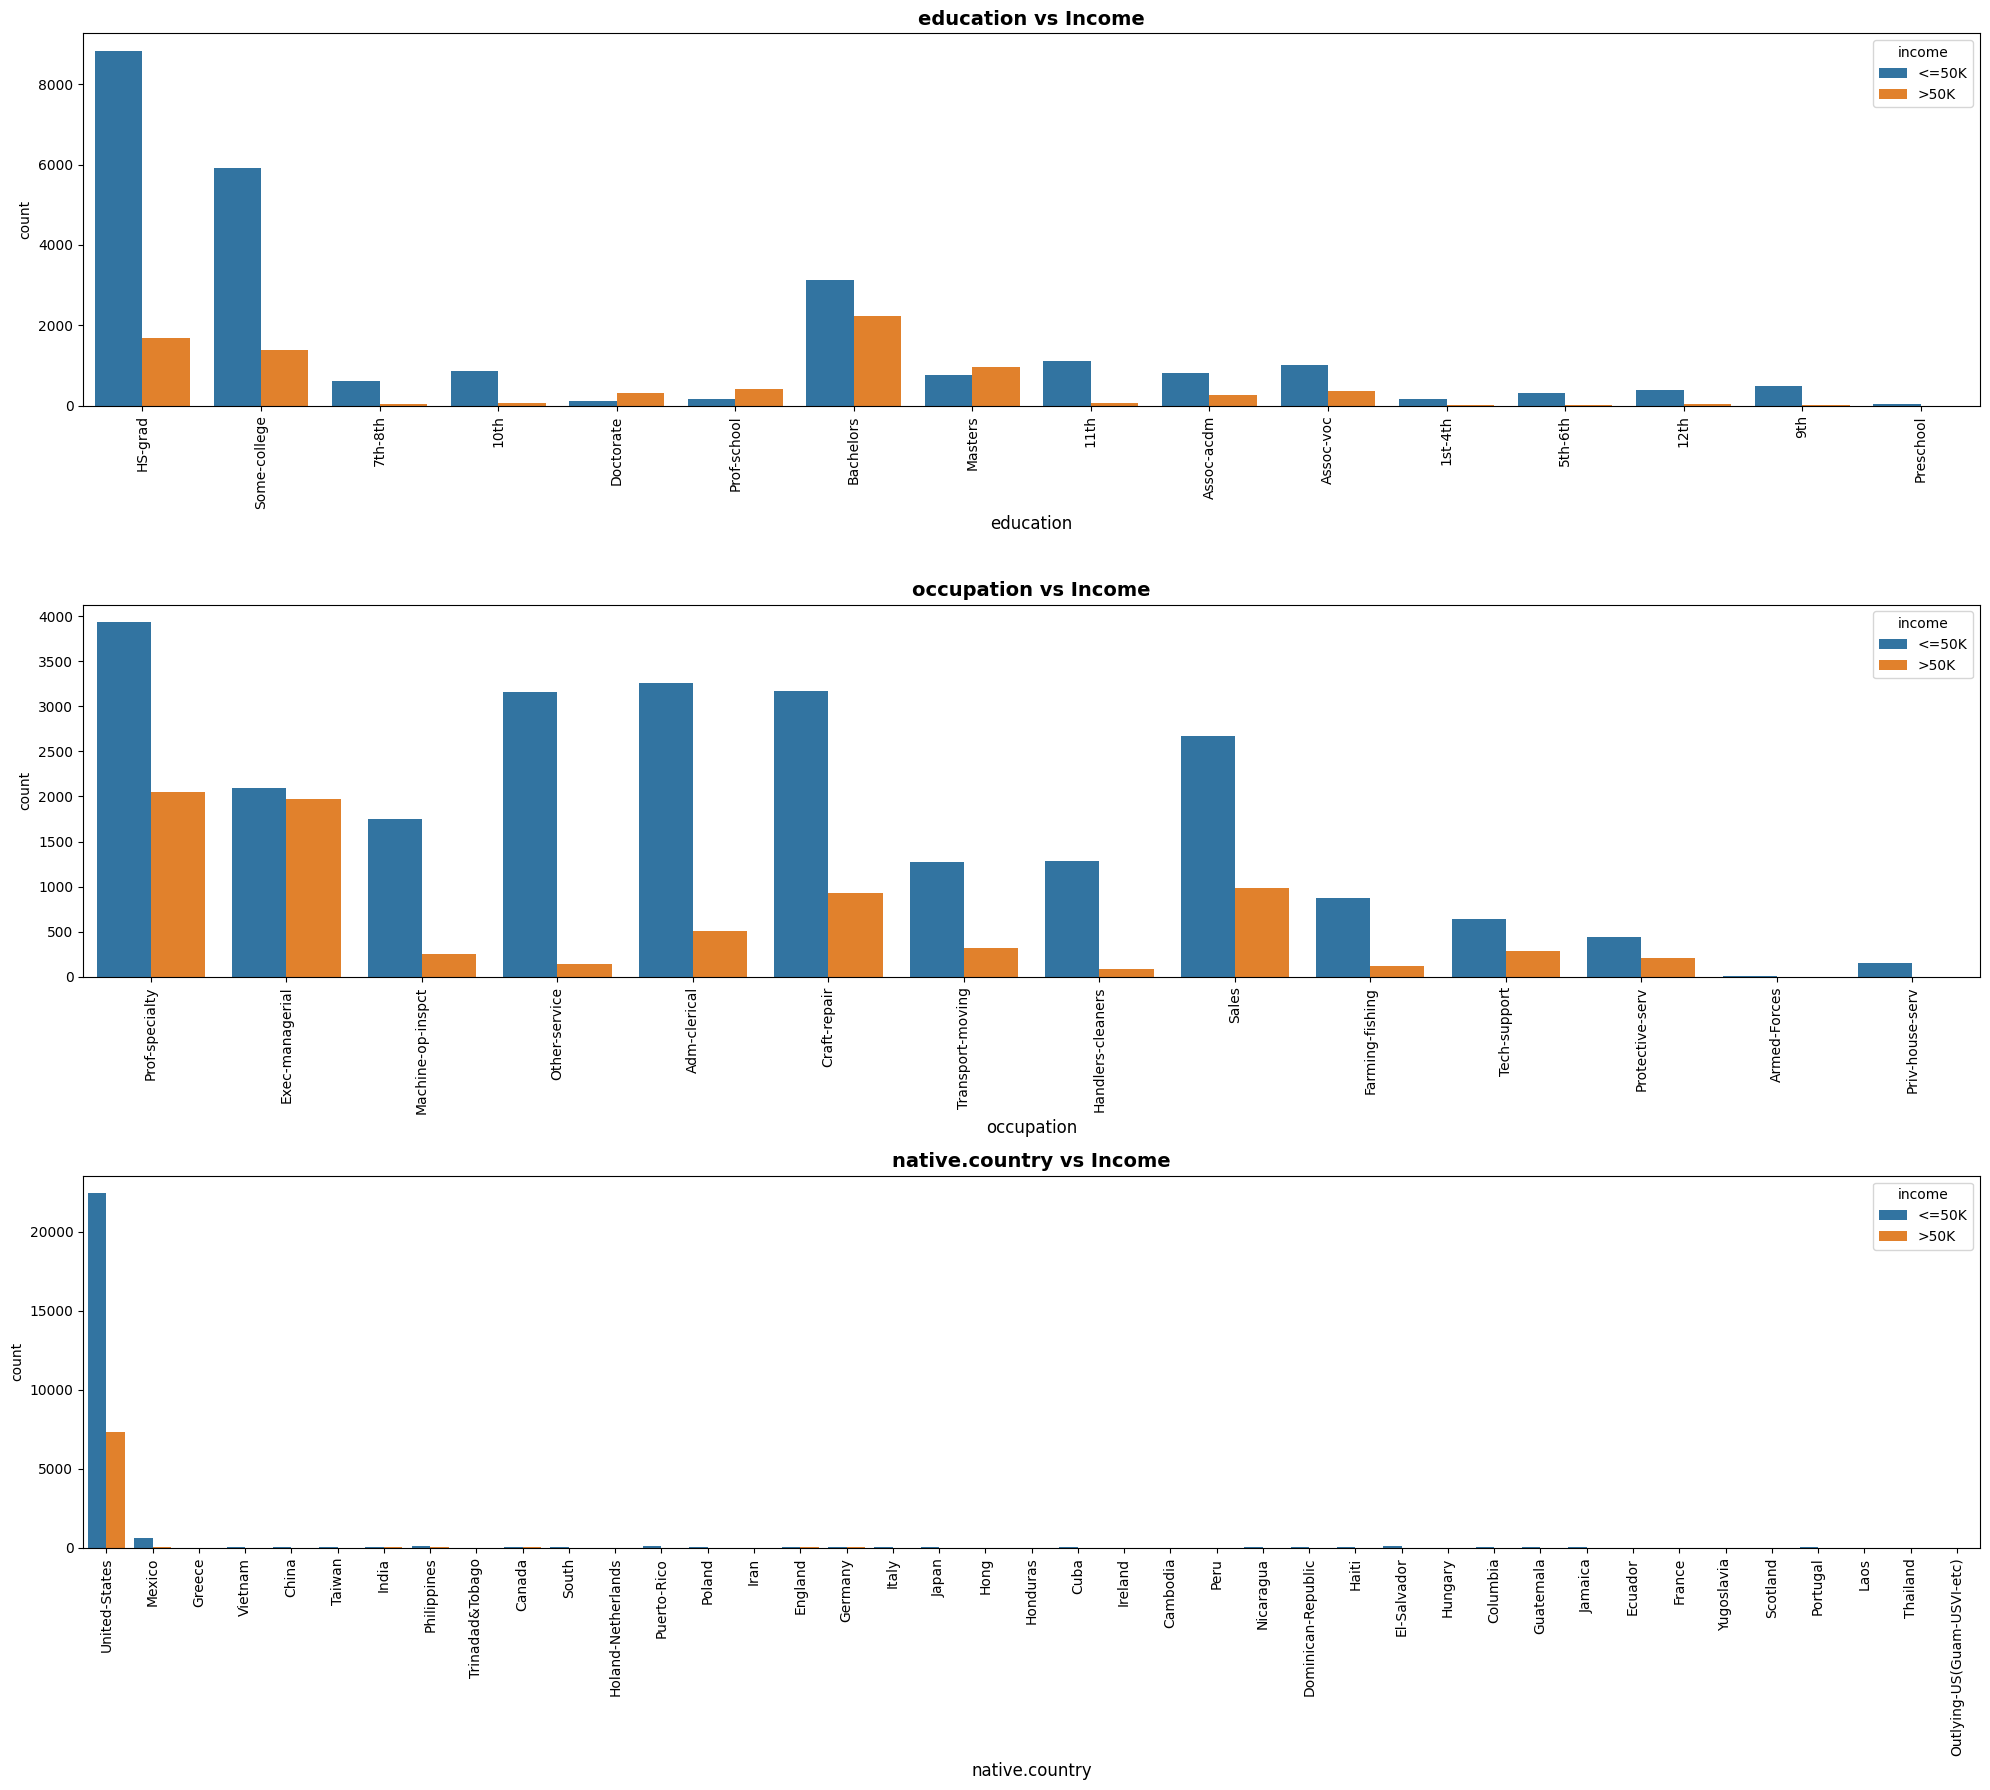

In [18]:
categorical_features = ['education', 'occupation', 'native.country']

plt.figure(figsize=(20, 18))
for index, feature in enumerate(categorical_features):
    plt.subplot(3, 1, index + 1)
    sns.countplot(x=data[feature], hue=data['income'])
    plt.title(f'{feature} vs Income', fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

## Feature Engineering

In [19]:
X = data.drop('income', axis=1)
y = data['income']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

In [21]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 
               'relationship', 'race', 'sex', 'native.country']

le = LabelEncoder()

for i in categorical:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

In [22]:
X_train.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5514,26,3,256263,11,9,4,2,1,4,1,0,0,25,38
19777,24,3,170277,11,9,4,7,1,4,0,0,0,35,38
10781,36,3,75826,9,13,0,0,4,4,0,0,0,40,38
32240,22,6,24395,15,10,2,0,5,4,0,0,0,20,38
9876,31,1,356689,9,13,2,9,0,4,1,0,0,40,38


In [23]:
X_test.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
14160,29,3,280618,15,10,2,5,0,4,1,0,0,40,38
27048,19,3,439779,15,10,4,11,3,4,1,0,0,15,38
28868,28,3,204734,15,10,2,12,5,4,0,0,0,40,38
5667,35,3,107991,1,7,4,11,1,4,1,0,0,45,38
7827,20,3,54152,15,10,4,0,3,4,0,0,0,30,38


## Feature Scaling

In [24]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [25]:
X_train.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-0.921955,-0.087596,0.632531,0.185620,-0.421727,0.924015,-1.036507,-0.278099,0.393979,0.703161,-0.147166,-0.21768,-1.258387,0.262402
1,-1.069150,-0.087596,-0.186155,0.185620,-0.421727,0.924015,0.220099,-0.278099,0.393979,-1.422150,-0.147166,-0.21768,-0.447517,0.262402
2,-0.185975,-0.087596,-1.085437,-0.331386,1.128259,-1.729577,-1.539149,1.588889,0.393979,-1.422150,-0.147166,-0.21768,-0.042081,0.262402
3,-1.216346,2.612645,-1.575119,1.219632,-0.034230,-0.402781,-1.539149,2.211218,0.393979,-1.422150,-0.147166,-0.21768,-1.663822,0.262402
4,-0.553965,-1.887757,1.588701,-0.331386,1.128259,-0.402781,0.722741,-0.900428,0.393979,0.703161,-0.147166,-0.21768,-0.042081,0.262402


In [26]:
X_test.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-0.701161,-0.087596,0.864418,1.219632,-0.03423,-0.402781,-0.282543,-0.900428,0.393979,0.703161,-0.147166,-0.21768,-0.042081,0.262402
1,-1.437140,-0.087596,2.379813,1.219632,-0.03423,0.924015,1.225383,0.966560,0.393979,0.703161,-0.147166,-0.21768,-2.069258,0.262402
2,-0.774759,-0.087596,0.141915,1.219632,-0.03423,-0.402781,1.476704,2.211218,0.393979,-1.422150,-0.147166,-0.21768,-0.042081,0.262402
3,-0.259573,-0.087596,-0.779189,-2.399409,-1.19672,0.924015,1.225383,-0.278099,0.393979,0.703161,-0.147166,-0.21768,0.363354,0.262402
4,-1.363542,-0.087596,-1.291798,1.219632,-0.03423,0.924015,-1.539149,0.966560,0.393979,-1.422150,-0.147166,-0.21768,-0.852952,0.262402


## Logistic Regression with all the features

In [27]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using Logistic Regression: {accuracy:.4f}%")

Accuracy using Logistic Regression: 0.8239%


### PCA Implementation

In [28]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14765595, 0.10165092, 0.08022079, 0.07863787, 0.07434499,
       0.07345943, 0.07055039, 0.06758342, 0.0647475 , 0.06137079,
       0.06093462, 0.04868965, 0.04268661, 0.02746708])

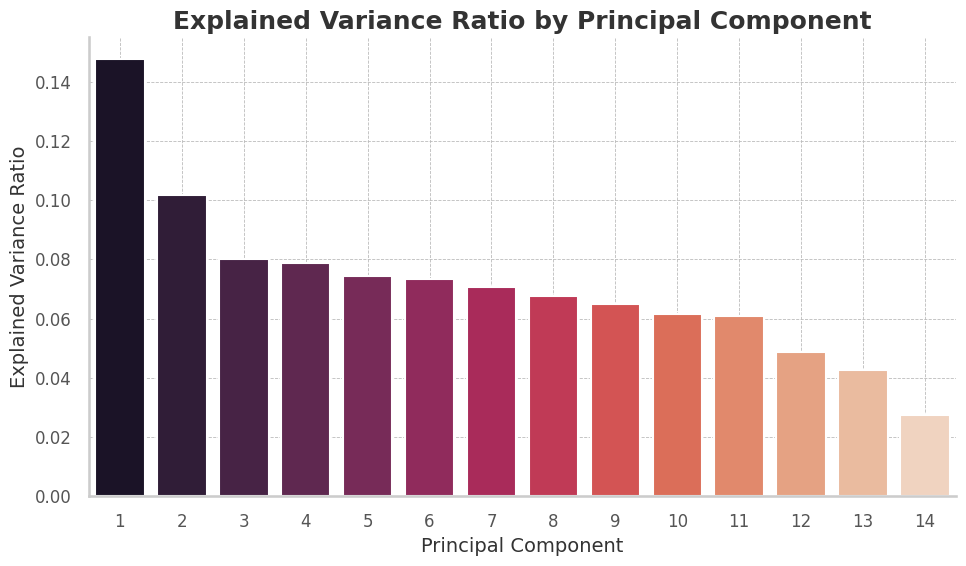

In [29]:
pca_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(pca.explained_variance_ratio_) + 1),
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.barplot(x='Principal Component', y='Explained Variance Ratio', data=pca_df, palette='rocket')

plt.title("Explained Variance Ratio by Principal Component", fontsize=18, fontweight='semibold', color='#333333')
plt.xlabel("Principal Component", fontsize=14, fontweight='medium', color='#333333')
plt.ylabel("Explained Variance Ratio", fontsize=14, fontweight='medium', color='#333333')

plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')
plt.grid(True, linestyle='--', linewidth=0.6, color='#bbbbbb') 

sns.despine()
plt.tight_layout()
plt.show()

***We can see that approximately 97.25% of the variance is explained by the first 13 variables. Only 2.75% of the variance is explained by the last variable, so we can assume that it carries little information. Therefore, I will drop it, retrain the model, and calculate the accuracy.***

### Logistic Regression with first 13 features

In [30]:
X_train = X_train.drop('native.country', axis=1)
X_test = X_test.drop('native.country', axis=1)

In [31]:
X_train.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,-0.921955,-0.087596,0.632531,0.185620,-0.421727,0.924015,-1.036507,-0.278099,0.393979,0.703161,-0.147166,-0.21768,-1.258387
1,-1.069150,-0.087596,-0.186155,0.185620,-0.421727,0.924015,0.220099,-0.278099,0.393979,-1.422150,-0.147166,-0.21768,-0.447517
2,-0.185975,-0.087596,-1.085437,-0.331386,1.128259,-1.729577,-1.539149,1.588889,0.393979,-1.422150,-0.147166,-0.21768,-0.042081
3,-1.216346,2.612645,-1.575119,1.219632,-0.034230,-0.402781,-1.539149,2.211218,0.393979,-1.422150,-0.147166,-0.21768,-1.663822
4,-0.553965,-1.887757,1.588701,-0.331386,1.128259,-0.402781,0.722741,-0.900428,0.393979,0.703161,-0.147166,-0.21768,-0.042081


In [32]:
lgr13 = LogisticRegression(random_state=42)
lgr13.fit(X_train, y_train)
y_pred13 = lgr13.predict(X_test)
accuracy13 = accuracy_score(y_test, y_pred13)
print(f"Accuracy score with 13 features: {accuracy13:.4f}%")

Accuracy score with 13 features: 0.8233%


***Now, we can clearly observe that there is no difference in accuracy even after dropping a feature that was found to be unimportant using PCA.***

### Logistic Regression with first 12 features

In [33]:
X_train = X_train.drop('hours.per.week', axis=1)
X_test = X_test.drop('hours.per.week', axis=1)

In [34]:
X_train.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss
0,-0.921955,-0.087596,0.632531,0.185620,-0.421727,0.924015,-1.036507,-0.278099,0.393979,0.703161,-0.147166,-0.21768
1,-1.069150,-0.087596,-0.186155,0.185620,-0.421727,0.924015,0.220099,-0.278099,0.393979,-1.422150,-0.147166,-0.21768
2,-0.185975,-0.087596,-1.085437,-0.331386,1.128259,-1.729577,-1.539149,1.588889,0.393979,-1.422150,-0.147166,-0.21768
3,-1.216346,2.612645,-1.575119,1.219632,-0.034230,-0.402781,-1.539149,2.211218,0.393979,-1.422150,-0.147166,-0.21768
4,-0.553965,-1.887757,1.588701,-0.331386,1.128259,-0.402781,0.722741,-0.900428,0.393979,0.703161,-0.147166,-0.21768


In [35]:
lgr12 = LogisticRegression(random_state=42)
lgr12.fit(X_train, y_train)
y_pred12 = lgr12.predict(X_test)
accuracy12 = accuracy_score(y_test, y_pred12)
print(f"Accuracy Score with 12 features: {accuracy12:.4f}%")

Accuracy Score with 12 features: 0.8217%


In [36]:
X_train.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss
0,-0.921955,-0.087596,0.632531,0.185620,-0.421727,0.924015,-1.036507,-0.278099,0.393979,0.703161,-0.147166,-0.21768
1,-1.069150,-0.087596,-0.186155,0.185620,-0.421727,0.924015,0.220099,-0.278099,0.393979,-1.422150,-0.147166,-0.21768
2,-0.185975,-0.087596,-1.085437,-0.331386,1.128259,-1.729577,-1.539149,1.588889,0.393979,-1.422150,-0.147166,-0.21768
3,-1.216346,2.612645,-1.575119,1.219632,-0.034230,-0.402781,-1.539149,2.211218,0.393979,-1.422150,-0.147166,-0.21768
4,-0.553965,-1.887757,1.588701,-0.331386,1.128259,-0.402781,0.722741,-0.900428,0.393979,0.703161,-0.147166,-0.21768


### Logistic Regression with first 11 features

In [37]:
X_train = X_train.drop('capital.loss', axis=1)
X_test = X_test.drop('capital.loss', axis=1)

lgr11 = LogisticRegression(random_state=42)
lgr11.fit(X_train, y_train)
y_pred11 = lgr11.predict(X_test)
accuracy11 = accuracy_score(y_test, y_pred11)
print(f"Accuracy Score with 11 features: {accuracy11:.4f}%")

Accuracy Score with 11 features: 0.8193%


### Logistic Regression with first 10 features

In [38]:
X_train = X_train.drop('capital.gain', axis=1)
X_test = X_test.drop('capital.gain', axis=1)

lgr10 = LogisticRegression(random_state=42)
lgr10.fit(X_train, y_train)
y_pred10 = lgr10.predict(X_test)
accuracy10 = accuracy_score(y_test, y_pred10)
print(f"Accuracy Score with 10 features: {accuracy10:.4f}%")

Accuracy Score with 10 features: 0.8022%


In [39]:
overall_accuracy = {
    "14 features": accuracy,
    "13 features": accuracy13,
    "12 features": accuracy12,
    "11 features": accuracy11,
    "10 features": accuracy10
}

overall_accuracy

{'14 features': 0.8238906801781053,
 '13 features': 0.8232765238753262,
 '12 features': 0.8217411331183786,
 '11 features': 0.8192845079072624,
 '10 features': 0.8022416705051436}

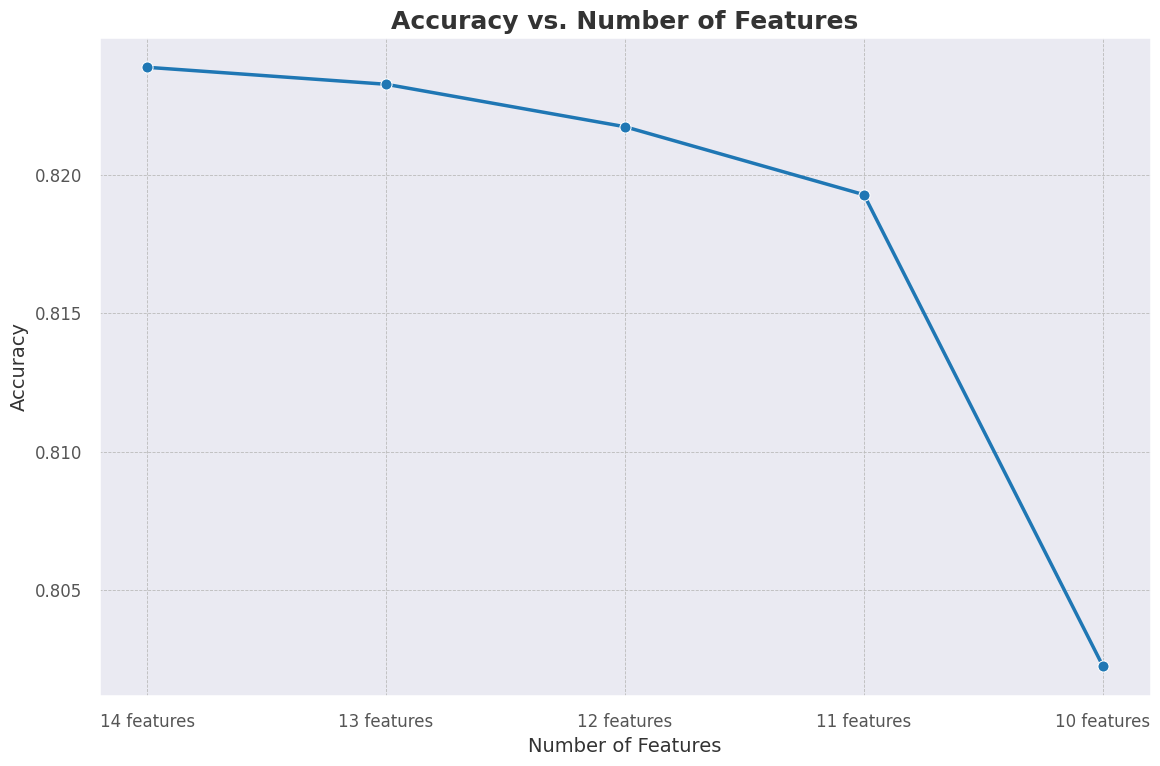

In [40]:
plt.figure(figsize=(12,8))

sns.set(style="darkgrid", context="talk")

sns.lineplot(x=list(overall_accuracy.keys()), y=list(overall_accuracy.values()), 
             marker='o', linewidth=2.5, color='#1f77b4', markersize=8)

plt.title("Accuracy vs. Number of Features", fontsize=18, fontweight='semibold', color='#333333')
plt.xlabel("Number of Features", fontsize=14, fontweight='medium', color='#333333')
plt.ylabel("Accuracy", fontsize=14, fontweight='medium', color='#333333')

plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')
plt.grid(True, linestyle='--', linewidth=0.6, color='#bbbbbb') 

plt.tight_layout()
plt.show()



## Conclusion

- PCA is a crucial method for dimensionality reduction, helping to identify the most significant features while eliminating those that have minimal impact on model accuracy.
- In the "Accuracy vs. Number of Features" analysis, we observe that the accuracy decreases slightly as we reduce the less important features. The line plot shows a gradual decline, indicating that the removal of these features has a minimal effect on the overall accuracy.